In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = sns.load_dataset("titanic")


In [3]:
# Display the first few rows of the dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Get summary statistics of numerical variables
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Check the dimensions of the dataset
print(df.shape)

(891, 15)


In [6]:
# Check the data types of variables
print(df.dtypes)

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [7]:
# Check for missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
# Handling missing values

df.dropna(inplace=True) # Remove rows with missing values  

# df.fillna(value, inplace=True)  # Fill missing values with a specific value

# # Handling outliers
# # Identify and remove outliers using statistical methods or domain knowledge

# # Data transformation
# # Perform necessary transformations like scaling, encoding, or feature engineering 

In [9]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [10]:
df.info()  #to get information about the DataFrame, including data types and missing values.

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


In [11]:
df['survived'].value_counts() #to get frequency counts for categorical variables.

survived
1    123
0     59
Name: count, dtype: int64

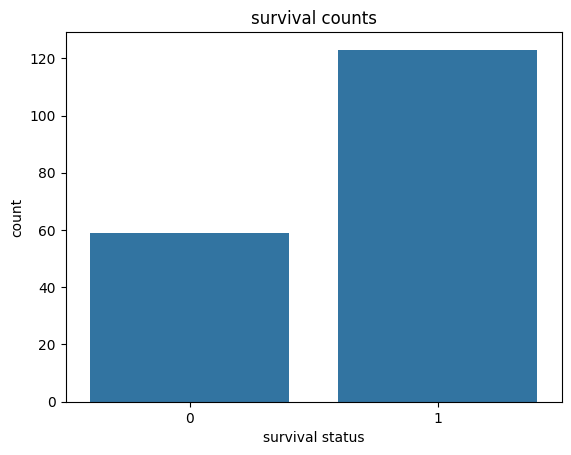

In [12]:
sns.countplot(x="survived", data=df)
plt.xlabel('survival status')
plt.ylabel("count")
plt.title("survival counts")
plt.show()

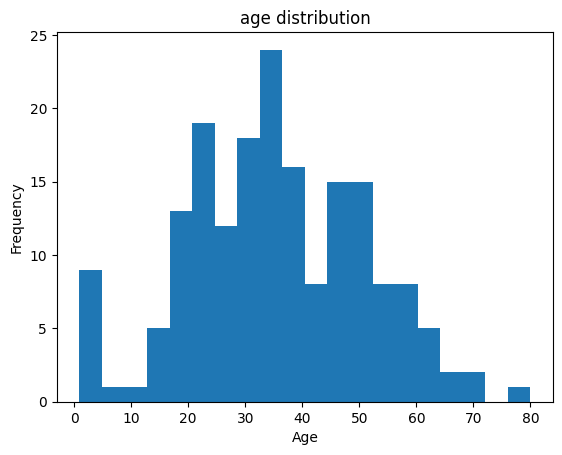

In [13]:
plt.hist(df["age"], bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("age distribution")
plt.show()

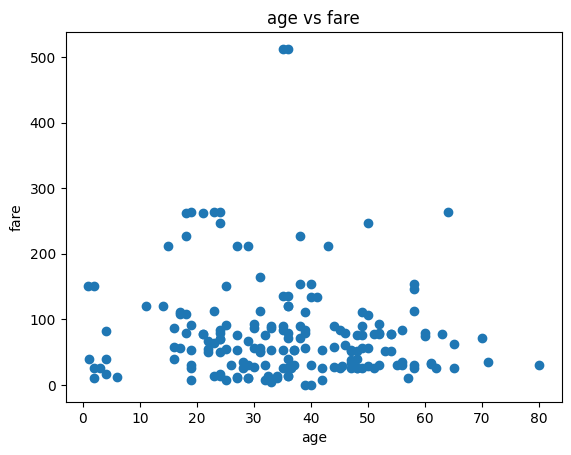

In [14]:
plt.scatter(df["age"], df["fare"])
plt.xlabel("age")
plt.ylabel("fare")
plt.title("age vs fare")
plt.show()


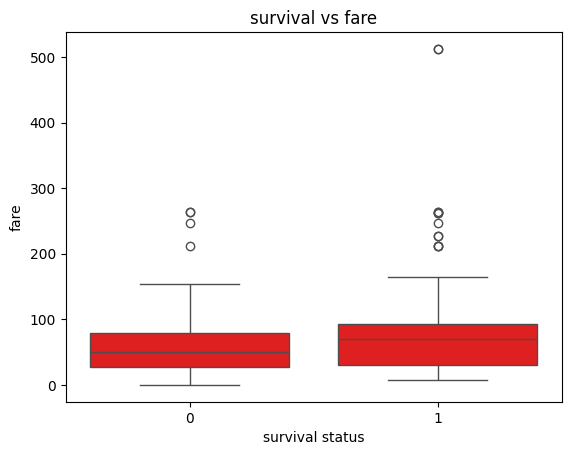

In [15]:
sns.boxplot(x=df["survived"], y=df["fare"], fill=True, color="r")
plt.xlabel("survival status")
plt.ylabel("fare")
plt.title("survival vs fare")
plt.show()

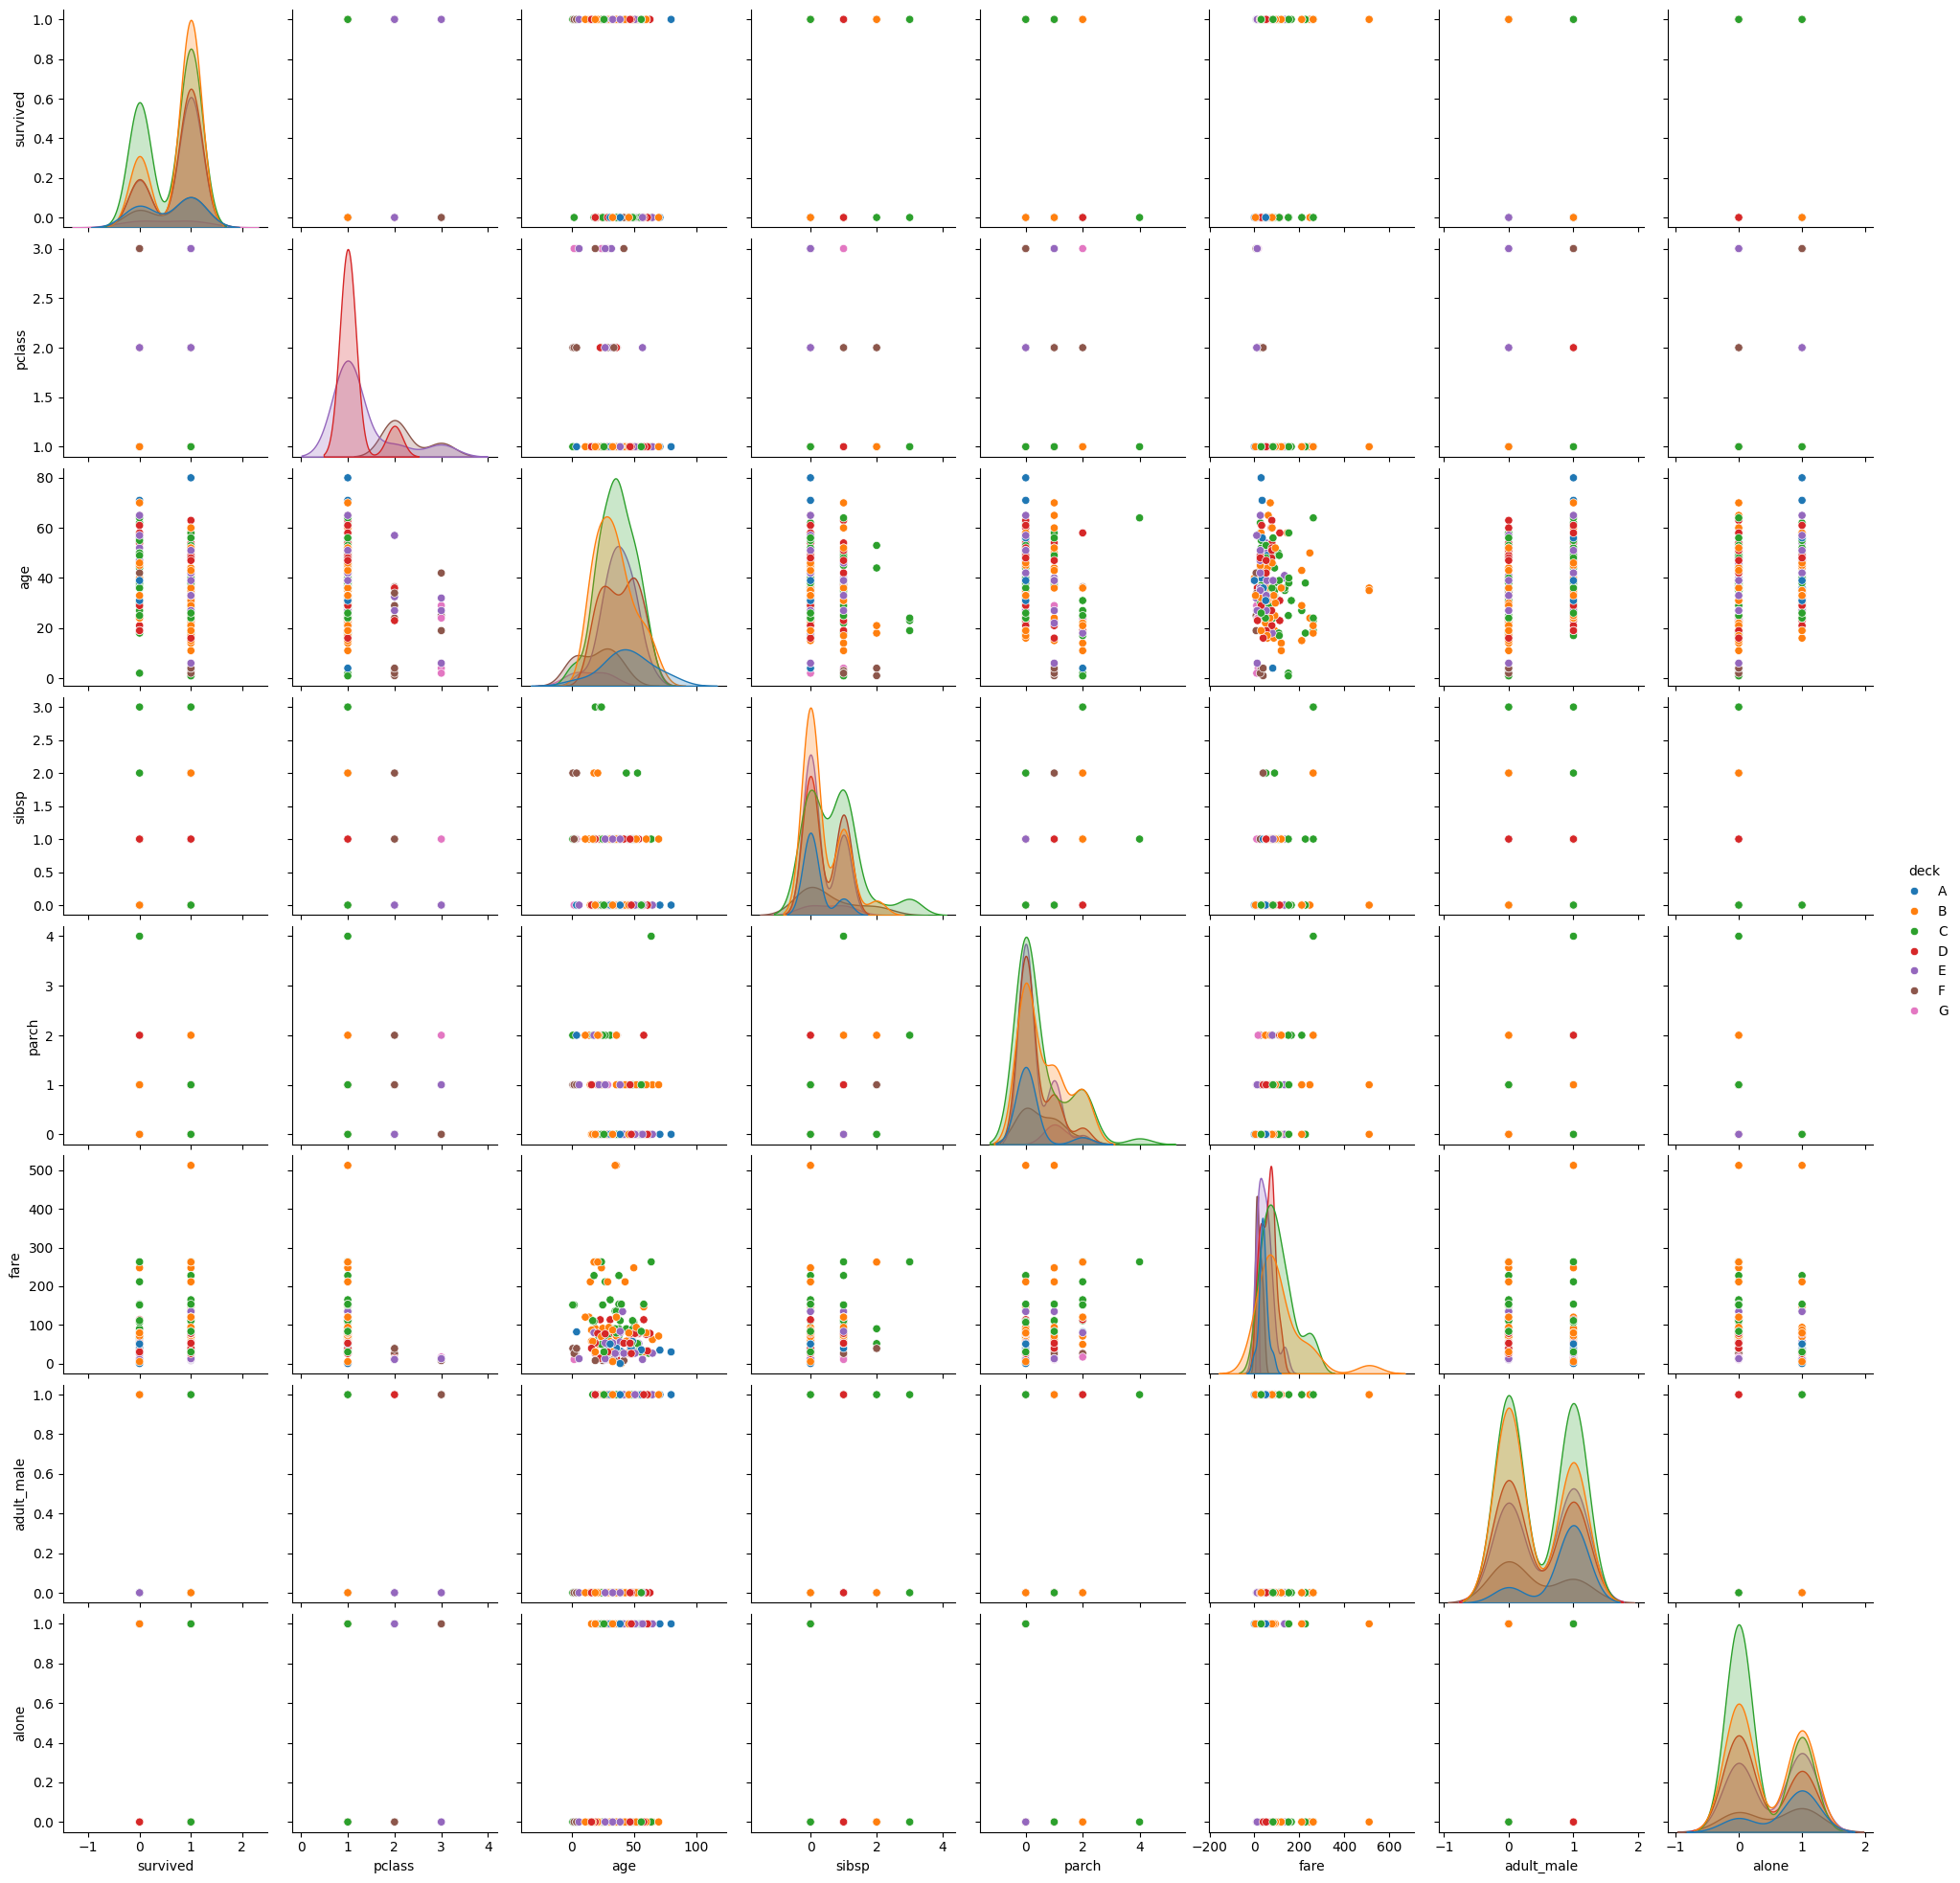

In [16]:
# sns.heatmap(data=df["survived"])
sns.pairplot(df, hue="deck")
plt.show()

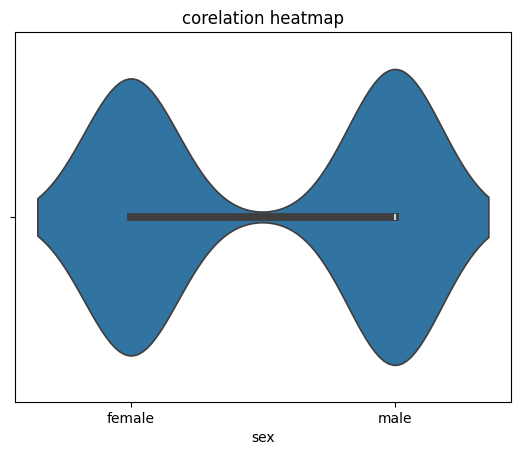

In [17]:

sns.violinplot(data=df, x="sex")
plt.title("corelation heatmap")
plt.show()

In [18]:
import plotly.express as px
px.scatter(x=df["survived"], y=df["deck"], data_frame=df, hover_name="survived")

In [19]:
# correlation analysis

correlation = df[["age", "fare"]].corr()
print(correlation)

          age     fare
age   1.00000 -0.09073
fare -0.09073  1.00000


In [20]:
# cross tabulation

cross_tab = pd.crosstab(df["pclass"], df["survived"])

print(cross_tab)

survived   0    1
pclass           
1         51  106
2          3   12
3          5    5


In [21]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [22]:
df.index
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [23]:
df = df.set_index('embark_town')
df.loc["Southampton"]


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
embark_town,,,,,,,,,,,,,,
Southampton,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,yes,False
Southampton,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,no,True
Southampton,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,yes,False
Southampton,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,yes,True
Southampton,1,2,male,34.0,0,0,13.0000,S,Second,man,True,D,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Southampton,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,yes,True
Southampton,0,1,male,31.0,0,0,50.4958,S,First,man,True,A,no,True
Southampton,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,yes,False


In [24]:
df = df.reset_index()
df.head()

,embark_town,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
0,Cherbourg,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,yes,False
1,Southampton,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,yes,False
2,Southampton,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,no,True
3,Southampton,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,yes,False
4,Southampton,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,yes,True


In [25]:
df.iloc[2]

embark_town    Southampton
survived                 0
pclass                   1
sex                   male
age                   54.0
sibsp                    0
parch                    0
fare               51.8625
embarked                 S
class                First
who                    man
adult_male            True
deck                     E
alive                   no
alone                 True
Name: 2, dtype: object

In [26]:
survivedCol = df["embark_town"] 
type(survivedCol)
survivedCol.head()

0      Cherbourg
1    Southampton
2    Southampton
3    Southampton
4    Southampton
Name: embark_town, dtype: object

In [27]:
hk = df.groupby('embark_town')
hk.first()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
embark_town,,,,,,,,,,,,,,
Cherbourg,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,yes,False
Queenstown,0,1,male,44.0,2,0,90.0000,Q,First,man,True,C,no,False
Southampton,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,yes,False


In [28]:
nf = pd.read_csv("nba.csv")
nf.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [29]:
gk = nf.groupby("Team")
gk.first()

,Name,Number,Position,Age,Height,Weight,College,Salary
Team,,,,,,,,
Atlanta Hawks,Kent Bazemore,24.0,SF,26.0,6-5,201.0,Old Dominion,2000000.0
Boston Celtics,Avery Bradley,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
Brooklyn Nets,Bojan Bogdanovic,44.0,SG,27.0,6-8,216.0,Oklahoma State,3425510.0
Charlotte Hornets,Nicolas Batum,5.0,SG,27.0,6-8,200.0,Virginia Commonwealth,13125306.0
Chicago Bulls,Cameron Bairstow,41.0,PF,25.0,6-9,250.0,New Mexico,845059.0
Cleveland Cavaliers,Matthew Dellavedova,8.0,PG,25.0,6-4,198.0,Saint Mary's,1147276.0
Dallas Mavericks,Justin Anderson,1.0,SG,22.0,6-6,228.0,Virginia,1449000.0
Denver Nuggets,Darrell Arthur,0.0,PF,28.0,6-9,235.0,Kansas,2814000.0
Detroit Pistons,Joel Anthony,50.0,C,33.0,6-9,245.0,UNLV,2500000.0


In [30]:
gk.get_group("Miami Heat")

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
339,Chris Bosh,Miami Heat,1.0,PF,32.0,6-11,235.0,Georgia Tech,22192730.0
340,Luol Deng,Miami Heat,9.0,SF,31.0,6-9,220.0,Duke,10151612.0
341,Goran Dragic,Miami Heat,7.0,PG,30.0,6-3,190.0,NaN,14783000.0
342,Gerald Green,Miami Heat,14.0,SF,30.0,6-7,205.0,NaN,947276.0
343,Udonis Haslem,Miami Heat,40.0,PF,36.0,6-8,235.0,Florida,2854940.0
344,Joe Johnson,Miami Heat,2.0,SF,34.0,6-7,240.0,Arkansas,261894.0
345,Tyler Johnson,Miami Heat,8.0,SG,24.0,6-4,186.0,Fresno State,845059.0
346,Josh McRoberts,Miami Heat,4.0,PF,29.0,6-10,240.0,Duke,5543725.0
347,Josh Richardson,Miami Heat,0.0,SG,22.0,6-6,200.0,Tennessee,525093.0
348,Amar'e Stoudemire,Miami Heat,5.0,PF,33.0,6-10,245.0,NaN,947276.0


In [31]:
gkk = nf.groupby(["Team", "Position"])
gkk.first()

Name  Number   Age Height  Weight  \
Team               Position                                                  
Atlanta Hawks      C               Al Horford    15.0  30.0   6-10   245.0   
                   PF          Kris Humphries    43.0  31.0    6-9   235.0   
                   PG         Dennis Schroder    17.0  22.0    6-1   172.0   
                   SF           Kent Bazemore    24.0  26.0    6-5   201.0   
                   SG        Tim Hardaway Jr.    10.0  24.0    6-6   205.0   
...                                       ...     ...   ...    ...     ...   
Washington Wizards C            Marcin Gortat    13.0  32.0   6-11   240.0   
                   PF             Drew Gooden    90.0  34.0   6-10   250.0   
                   PG          Ramon Sessions     7.0  30.0    6-3   190.0   
                   SF            Jared Dudley     1.0  30.0    6-7   225.0   
                   SG           Alan Anderson     6.0  33.0    6-6   220.0   

                                          College      Salary  
Team               Position                                    
Atlanta Hawks      C                      Florida  12000000.0  
                   PF                   Minnesota   1000000.0  
                   PG                 Wake Forest   1763400.0  
                   SF                Old Dominion   2000000.0  
                   SG                    Michigan   1304520.0  
...                                           ...         ...  
Washington Wizards C         North Carolina State  11217391.0  
                   PF                      Kansas   3300000.0  
                   PG                      Nevada   2170465.0  
                   SF              Boston College   4375000.0  
                   SG              Michigan State   4000000.0  

[149 rows x 7 columns]

In [32]:
nf.Team == "Miami Heat"

0      False
1      False
2      False
3      False
4      False
       ...  
453    False
454    False
455    False
456    False
457    False
Name: Team, Length: 458, dtype: bool

In [33]:
nf[nf.Team == "Miami Heat"]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
339,Chris Bosh,Miami Heat,1.0,PF,32.0,6-11,235.0,Georgia Tech,22192730.0
340,Luol Deng,Miami Heat,9.0,SF,31.0,6-9,220.0,Duke,10151612.0
341,Goran Dragic,Miami Heat,7.0,PG,30.0,6-3,190.0,NaN,14783000.0
342,Gerald Green,Miami Heat,14.0,SF,30.0,6-7,205.0,NaN,947276.0
343,Udonis Haslem,Miami Heat,40.0,PF,36.0,6-8,235.0,Florida,2854940.0
344,Joe Johnson,Miami Heat,2.0,SF,34.0,6-7,240.0,Arkansas,261894.0
345,Tyler Johnson,Miami Heat,8.0,SG,24.0,6-4,186.0,Fresno State,845059.0
346,Josh McRoberts,Miami Heat,4.0,PF,29.0,6-10,240.0,Duke,5543725.0
347,Josh Richardson,Miami Heat,0.0,SG,22.0,6-6,200.0,Tennessee,525093.0
348,Amar'e Stoudemire,Miami Heat,5.0,PF,33.0,6-10,245.0,NaN,947276.0


In [34]:
pf = pd.DataFrame({
    "name":["albert", "eistein", "galileo"],
    "category": ["physics", "physics", "geography"]
})

pf.head()

,name,category
0,albert,physics
1,eistein,physics
2,galileo,geography


In [35]:
lf = pd.DataFrame.from_dict(
    [
        {"name": "albert", "category": "physics"},
        {"name": "eistein", "category": "physics"},
        {"name": "galileo", "category": "geogrphy"},
    ]
)

lf.head()

,name,category
0,albert,physics
1,eistein,physics
2,galileo,geogrphy


In [36]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


In [37]:
nf.describe(include=['object'])


,Name,Team,Position,Height,College
count,457,457,457,457,373
unique,457,30,5,18,118
top,Avery Bradley,New Orleans Pelicans,SG,6-9,Kentucky
freq,1,19,102,59,22


In [38]:
nf.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [39]:
df.describe(include=["object"])

,embark_town,sex,embarked,who,alive
count,182,182,182,182,182
unique,3,2,3,3,2
top,Southampton,male,S,man,yes
freq,115,94,115,87,123


In [40]:
df["embark_town"].describe()

count             182
unique              3
top       Southampton
freq              115
Name: embark_town, dtype: object

In [41]:
nf["Age"].describe()

count    457.000000
mean      26.938731
std        4.404016
min       19.000000
25%       24.000000
50%       26.000000
75%       30.000000
max       40.000000
Name: Age, dtype: float64

In [42]:
fourty = nf.Age == 40
f = nf[fourty]

f.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
298,Tim Duncan,San Antonio Spurs,21.0,C,40.0,6-11,250.0,Wake Forest,5250000.0
304,Andre Miller,San Antonio Spurs,24.0,PG,40.0,6-3,200.0,Utah,250750.0
400,Kevin Garnett,Minnesota Timberwolves,21.0,PF,40.0,6-11,240.0,NaN,8500000.0


In [43]:
forty = df["age"] > 40
f = df[forty]
f.head()

,embark_town,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
2,Southampton,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,no,True
4,Southampton,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,yes,True
8,Cherbourg,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,yes,False
9,Cherbourg,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,no,False
10,Southampton,0,1,male,45.0,1,0,83.4750,S,First,man,True,C,no,False


In [44]:
new = df.age < 18
i = df[new]
i.tail()

,embark_town,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
138,Southampton,1,1,female,15.0,0,1,211.3375,S,First,child,False,B,yes,False
157,Southampton,1,3,male,6.0,0,1,12.4750,S,Third,child,False,E,yes,False
163,Southampton,1,1,female,17.0,1,0,57.0000,S,First,woman,False,B,yes,False
167,Southampton,1,1,male,11.0,1,2,120.0000,S,First,child,False,B,yes,False
173,Southampton,1,1,female,16.0,0,1,39.4000,S,First,woman,False,D,yes,False


In [45]:
il = df.who == "woman"
no = df[il]
no.count()

embark_town    82
survived       82
pclass         82
sex            82
age            82
sibsp          82
parch          82
fare           82
embarked       82
class          82
who            82
adult_male     82
deck           82
alive          82
alone          82
dtype: int64

In [46]:
biCol = df.who
biCol

0      woman
1      woman
2        man
3      child
4      woman
       ...  
177    woman
178      man
179    woman
180    woman
181      man
Name: who, Length: 182, dtype: object

In [47]:
nf.College.describe()

count          373
unique         118
top       Kentucky
freq            22
Name: College, dtype: object

In [48]:
newCol = nf.College
newCol[1:24].count()

19

In [49]:
newCol.replace("NaN", np.nan, inplace=True)
newCol

0                  Texas
1              Marquette
2      Boston University
3          Georgia State
4                    NaN
             ...        
453               Butler
454                  NaN
455                  NaN
456               Kansas
457                  NaN
Name: College, Length: 458, dtype: object

In [50]:
for name, rows in nf.groupby("Name"):
    print(f"name:{name}, numbers of rows: {len(rows)}")

name:Aaron Brooks, numbers of rows: 1
name:Aaron Gordon, numbers of rows: 1
name:Aaron Harrison, numbers of rows: 1
name:Adreian Payne, numbers of rows: 1
name:Al Horford, numbers of rows: 1
name:Al Jefferson, numbers of rows: 1
name:Al-Farouq Aminu, numbers of rows: 1
name:Alan Anderson, numbers of rows: 1
name:Alan Williams, numbers of rows: 1
name:Alec Burks, numbers of rows: 1
name:Alex Len, numbers of rows: 1
name:Alex Stepheson, numbers of rows: 1
name:Alexis Ajinca, numbers of rows: 1
name:Allen Crabbe, numbers of rows: 1
name:Alonzo Gee, numbers of rows: 1
name:Amar'e Stoudemire, numbers of rows: 1
name:Amir Johnson, numbers of rows: 1
name:Anderson Varejao, numbers of rows: 1
name:Andre Drummond, numbers of rows: 1
name:Andre Iguodala, numbers of rows: 1
name:Andre Miller, numbers of rows: 1
name:Andre Roberson, numbers of rows: 1
name:Andrew Bogut, numbers of rows: 1
name:Andrew Goudelock, numbers of rows: 1
name:Andrew Nicholson, numbers of rows: 1
name:Andrew Wiggins, numbe

In [51]:
for name, rows in nf.groupby("Team"):
    print("name: %s, rows:%d" %(name, len(rows)))

name: Atlanta Hawks, rows:15
name: Boston Celtics, rows:15
name: Brooklyn Nets, rows:15
name: Charlotte Hornets, rows:15
name: Chicago Bulls, rows:15
name: Cleveland Cavaliers, rows:15
name: Dallas Mavericks, rows:15
name: Denver Nuggets, rows:15
name: Detroit Pistons, rows:15
name: Golden State Warriors, rows:15
name: Houston Rockets, rows:15
name: Indiana Pacers, rows:15
name: Los Angeles Clippers, rows:15
name: Los Angeles Lakers, rows:15
name: Memphis Grizzlies, rows:18
name: Miami Heat, rows:15
name: Milwaukee Bucks, rows:16
name: Minnesota Timberwolves, rows:14
name: New Orleans Pelicans, rows:19
name: New York Knicks, rows:16
name: Oklahoma City Thunder, rows:15
name: Orlando Magic, rows:14
name: Philadelphia 76ers, rows:15
name: Phoenix Suns, rows:15
name: Portland Trail Blazers, rows:15
name: Sacramento Kings, rows:15
name: San Antonio Spurs, rows:15
name: Toronto Raptors, rows:15
name: Utah Jazz, rows:15
name: Washington Wizards, rows:15


In [52]:
pd.concat([g for _, g in nf.groupby("Team") if len(g) > 15])["Team"]

257    Memphis Grizzlies
258    Memphis Grizzlies
259    Memphis Grizzlies
260    Memphis Grizzlies
261    Memphis Grizzlies
             ...        
41       New York Knicks
42       New York Knicks
43       New York Knicks
44       New York Knicks
45       New York Knicks
Name: Team, Length: 69, dtype: object

In [53]:
dupesByTeam = nf[nf.duplicated("Team")]
dupesByTeam.tail()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [54]:
dupesByTeam.sort_values("Name")[["Name", "Team", "Position"]]

,Name,Team,Position
152,Aaron Brooks,Chicago Bulls,PG
356,Aaron Gordon,Orlando Magic,PF
328,Aaron Harrison,Charlotte Hornets,SG
404,Adreian Payne,Minnesota Timberwolves,PF
312,Al Horford,Atlanta Hawks,C
...,...,...,...
386,Wilson Chandler,Denver Nuggets,SF
270,Xavier Munford,Memphis Grizzlies,PG
402,Zach LaVine,Minnesota Timberwolves,PG
271,Zach Randolph,Memphis Grizzlies,PF


In [57]:
nf["Team"][153]

'Atlanta Hawks'

In [56]:
nf.loc[153, "Team"] = "Atlanta Hawks"

In [58]:
# def clean_data(df):
#     df = df.replace('', np.nan)
#     df_born_in = df[df.born_in.notnull()] 
#     df = df[df.born_in.isnull()]
#     df = df.drop('born_in', axis=1)
#     df.drop(df[df.year == 1809].index, inplace=True)
#     df = df[~(df.name == 'Marie Curie')]
#     df.loc[(df.name == u'Marie Sk\u0142odowska-Curie') &\
#         (df.year == 1911), 'country'] = 'France'
#     df = df[~((df.name == 'Sidney Altman') & (df.year == 1990))]
#     df = df.reindex(np.random.permutation(df.index)) 
#     df = df.drop_duplicates(['name', 'year'])
#     df = df.sort_index()
#     df.ix[df.name == 'Alexis Carrel', 'category'] =\
#         'Physiology or Medicine'
#     df.ix[df.name == 'Ragnar Granit', 'gender'] = 'male'
#     df = df[df.gender.notnull()] # remove institutional prizes
#     df.ix[df.name == 'Hiroshi Amano', 'date_of_birth'] =\
#         '11 September 1960'
#     df.date_of_birth = pd.to_datetime(df.date_of_birth) 
#     df.date_of_death = pd.to_datetime(df.date_of_death,\
#         errors='coerce')
#     df['award_age'] = df.year - pd.DatetimeIndex(df.date_of_birth)\
#         .year
#     return df, df_born_in

In [103]:
from datetime import datetime

x = pd.period_range(datetime.now(), periods=200, freq="d")
x = x.to_timestamp().to_pydatetime()
y = np.random.randn(200,3).cumsum(0)

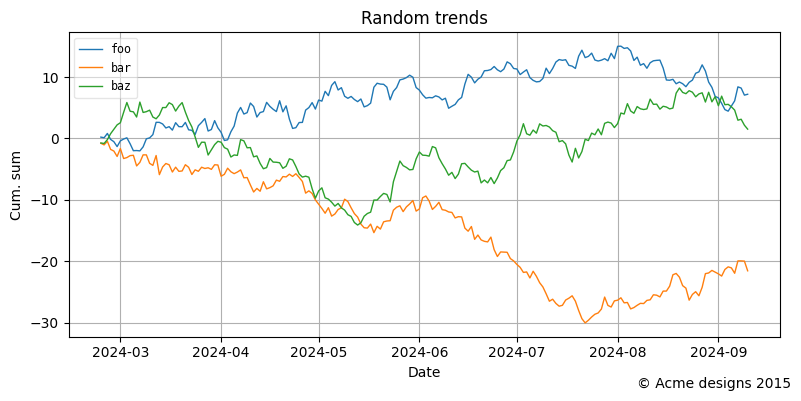

In [104]:
plots = plt.plot(x, y)
plt.legend(plots, ('foo', 'bar', 'baz'), 
loc='best', 
framealpha=0.5, 
prop={'size':'small', 'family':'monospace'}) 
plt.title('Random trends')
plt.xlabel('Date')
plt.ylabel('Cum. sum')
plt.figtext(0.995, 0.01, u'© Acme designs 2015',ha='right', va='bottom') 
plt.grid(True)
plt.tight_layout()

In [83]:
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.color'] = 'r' # red
plt.rcParams['figure.figsize'] = (8,4)
plt.gcf().set_size_inches(8, 4)

<Figure size 800x400 with 0 Axes>

[]

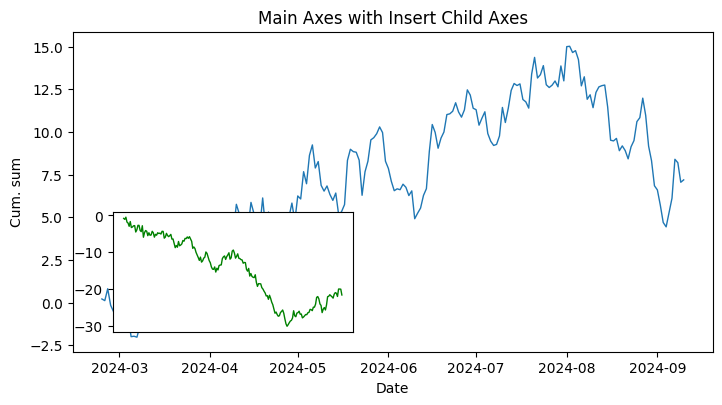

In [108]:
fig = plt.figure(figsize=(8,4))
 # --- Main Axes
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_title('Main Axes with Insert Child Axes')
ax.plot(x, y[:,0]) 
ax.set_xlabel('Date')
ax.set_ylabel('Cum. sum')
 # --- Inserted Axes
ax = fig.add_axes([0.15, 0.15, 0.3, 0.3])
ax.plot(x, y[:,1], color='g') # 'g' for green
ax.set_xticks([])

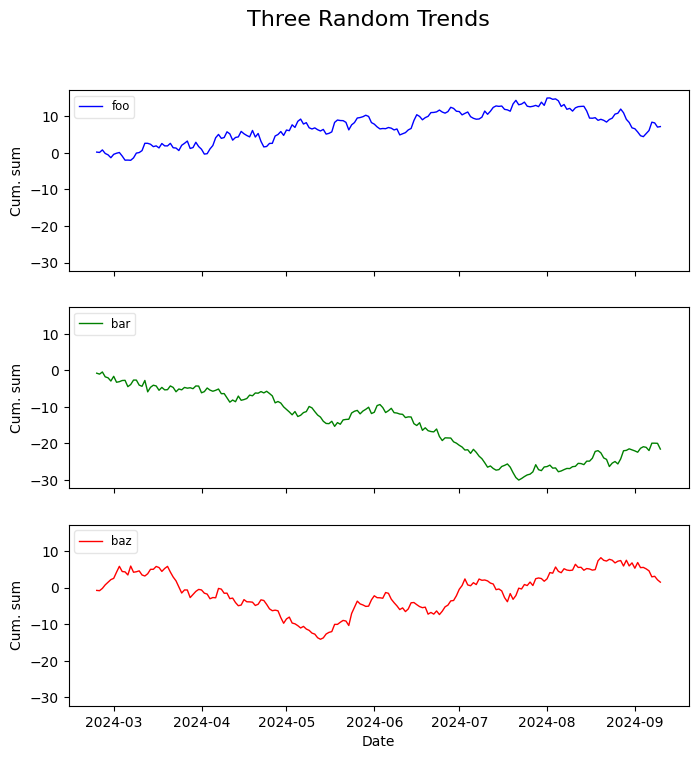

In [107]:
fig, axes = plt.subplots(
 nrows=3, ncols=1, 
sharex=True, sharey=True, 
figsize=(8, 8))
labelled_data = zip(y.transpose(), 
    ('foo', 'bar', 'baz'), ('b', 'g', 'r'))
fig.suptitle('Three Random Trends', fontsize=16)
for i, ld in enumerate(labelled_data):
    ax = axes[i]
    ax.plot(x, ld[0], label=ld[1], color=ld[2])
    ax.set_ylabel('Cum. sum')
    ax.legend(loc='upper left', framealpha=0.5,
    prop={'size':'small'})
    axes[-1].set_xlabel('Date')

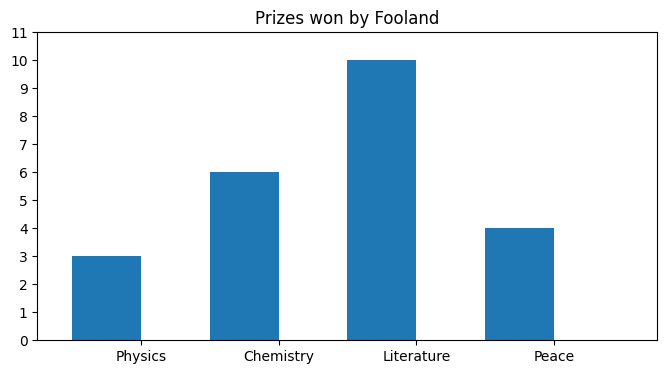

In [109]:
labels = ["Physics", "Chemistry", "Literature", "Peace"]
foo_data =   [3, 6, 10, 4]
bar_width = 0.5
xlocations = np.array(range(len(foo_data))) + bar_width 
plt.bar(xlocations, foo_data, width=bar_width)
plt.yticks(range(0, 12))
plt.xticks(xlocations+bar_width/2, labels) 
plt.xlim(0, xlocations[-1]+bar_width*2) 
plt.title("Prizes won by Fooland")
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.gcf().set_size_inches((8, 4))

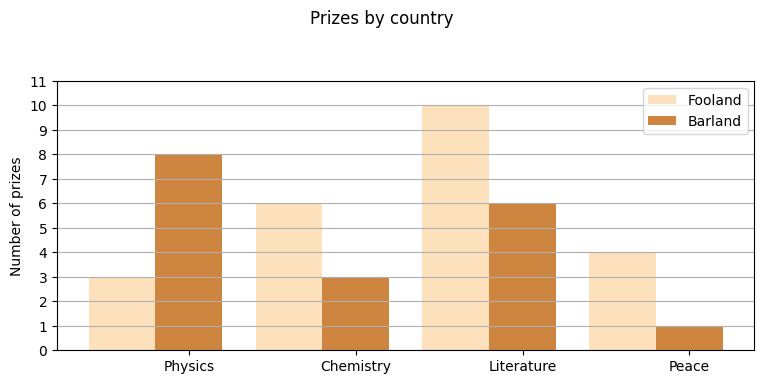

In [110]:
labels = ["Physics", "Chemistry", "Literature", "Peace"]
foo_data =   [3, 6, 10, 4]
bar_data = [8, 3, 6, 1]
fig, ax = plt.subplots(figsize=(8, 4))
bar_width = 0.4 
xlocs = np.arange(len(foo_data))
ax.bar(xlocs-bar_width, foo_data, bar_width,
color='#fde0bc', label='Fooland') 
ax.bar(xlocs, bar_data, bar_width, color='peru', label='Barland')
 #--- ticks, labels, grids, and title
ax.set_yticks(range(12))
ax.set_xticks(ticks=range(len(foo_data)))
ax.set_xticklabels(labels)
ax.yaxis.grid(True)
ax.legend(loc='best')
ax.set_ylabel('Number of prizes')
fig.suptitle('Prizes by country')
fig.tight_layout(pad=2) 
fig.savefig('mpl_barchart_multi.png', dpi=200)